In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Clasificacion mediante regresion logistica

Vamos a generar un conjunto de datos artificiales que consistiran en imagenes en 1 bit de 51x51 pixeles con cuadrados y circulos de diferentes tamaños centrados

In [2]:
def circle(nx : int, ny: int, rad: int):
    '''funcion para construir circulos'''
    assert rad < min(nx,ny), 'el circulo debe estar completamente dentro'
    canvas = np.zeros(shape=(nx,ny))
    for i in range(nx):
        for j in range(ny):
            if ((i-nx//2)**2 + (j-ny//2)**2 < rad**2):
                canvas[i,j] = 1
    return canvas    

def square(nx : int, ny: int, length: int):
    '''funcion para construir cuadradillos'''
    assert length < min(nx,ny), 'el circulo debe estar completamente dentro'
    canvas = np.ones(shape=(nx,ny))
    for i in range(nx):
        for j in range(ny):
            if (np.abs(i-nx//2) > length) or (np.abs(j-ny//2) > length):
                canvas[i,j] = 0
    return canvas    

In [3]:
nx = 51
ny = 51

In [4]:
# creacion del dataset. Asignamos 0 a los circulos y 1 a los cuadrados

rng = np.random.default_rng()
y_train = rng.integers(0,2,200)
x_train = []
for i in y_train:
    if i == 0:
        x_train.append(circle(nx, ny, rng.integers(1,25)))
    else:
        x_train.append(square(nx, ny, rng.integers(1,25)))

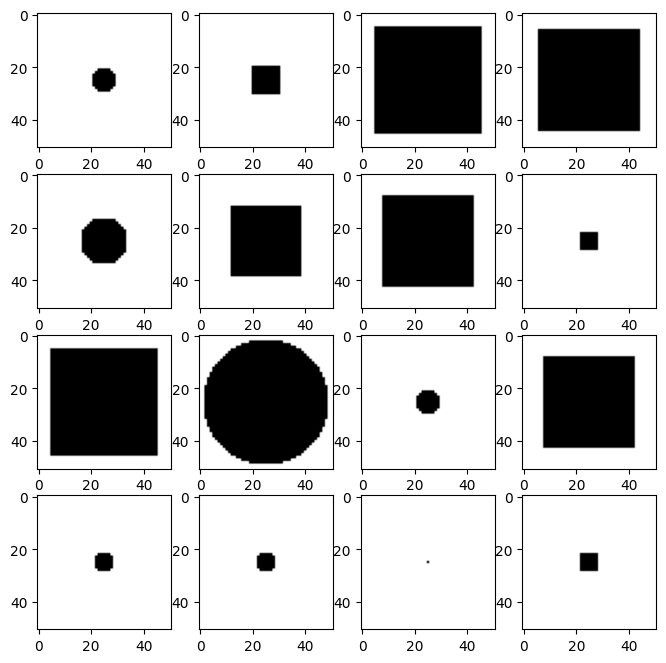

In [5]:
# examinamos algunos casos ocularmente

fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = rng.choice(x_train)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='Grays')
plt.show()

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def loss(y, y_hat):
    '''
    función que computa la función de pérdida. 
    y: valores predichos por el modelo
    y_hat: valores verdaderos
    ''' 
    eps = 1e-10
    return -np.mean(y_hat*np.log(y + eps) + (1-y_hat)*np.log(1 - y + eps))

def dloss(a, b, x, y_hat):
    '''
    Gradiente de la función de pérdida
    da: derivada en la direccion de a
    db: derivada en la direccion de b
    '''
    da = np.mean((sigmoid(a*x+b)-y_hat)*x)
    db = np.mean(sigmoid(a*x+b)-y_hat)
    return da, db

def train(x, y_hat, epochs = 10, a = 0, b = 0, lr = 0.2):
    '''
    Funcion que entrena al modelo encontrando los valores optimos de los parametros (a y b)
    x: valor de entrada de la variable (feature)
    y_hat: valor verdadero de la funcion en x
    epochs: numero de veces que se recorrera todo el set de datos
    lr: tasa de aprendizaje (learning rate)
    '''
    grad = dloss(a,b,x,y_hat)   # calculo del gradiente para el paso cero
    history = [[a,b, grad[0], grad[1], loss(sigmoid(a*x+b),y_hat)]] # guardo los valores para observar el entrenamiento
    for i in range(epochs):
        grad = dloss(a,b,x,y_hat)   # calculo del gradiente para todo el conjunto de datos
        a -= lr * grad[0]        # paso de descenso por el gradiente
        b -=  lr * grad[1]        # paso de descenso por el gradiente
        history.append([a,b, grad[0], grad[1], loss(sigmoid(a*x+b),y_hat)])  # guardo la historia
    return a,b, history

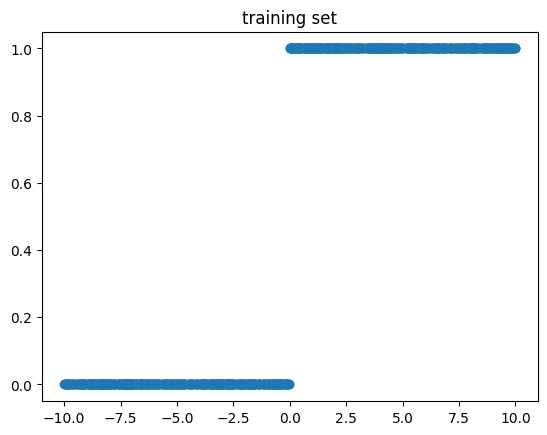

valores optimos: (8.333063497643113, 0.38489622231953025)


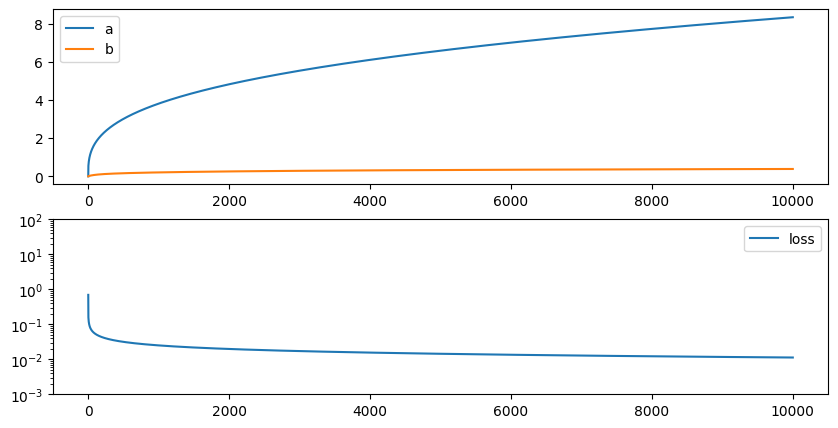

In [13]:
rng = np.random.default_rng()
x_train = rng.uniform(-10,10,1000)
y_train = np.int32(sigmoid(x_train)+0.5)
plt.title('training set')
plt.scatter(x_train,y_train)
plt.show()
a_opt,b_opt,hist = train(x_train, y_train, epochs= 10000)
print(f'valores optimos: {a_opt, b_opt}')
hist = np.array(hist)
fig, axs = plt.subplots(2,1, figsize = (10,5))
axs[0].plot(hist[:,0], label='a')
axs[0].plot(hist[:,1], label = 'b')
axs[0].legend()
axs[1].semilogy(hist[:,4], label = 'loss')
axs[1].set_ylim(1e-3,100)
axs[1].legend()

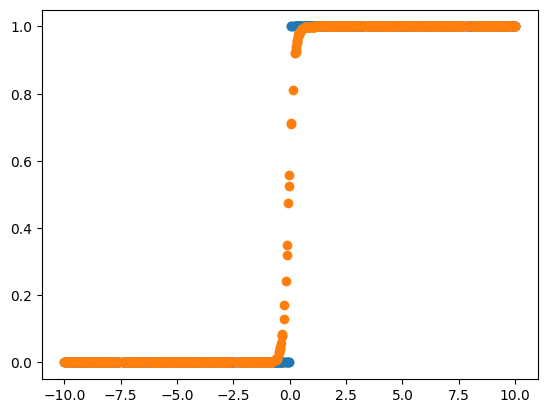

In [14]:
x_train = rng.uniform(-10,10,1000)
y_train = np.int32(sigmoid(x_train)+0.5)
plt.plot(x_train, y_train, 'o')
plt.plot(x_train,sigmoid(a_opt*x_train+b_opt), 'o')